In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

import numpy as np
import matplotlib.pyplot as plt

import mnisttools as mt

%matplotlib inline

Using Theano backend.


In [2]:
X_train, X_test, y_train, y_test = mt.load_train_test()
print('Training dimensions: %s x %s' % (X_train.shape[0], X_train.shape[1]))
print('Testing dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))

Training dimensions: 3350 x 1
Testing dimensions: 1650 x 1


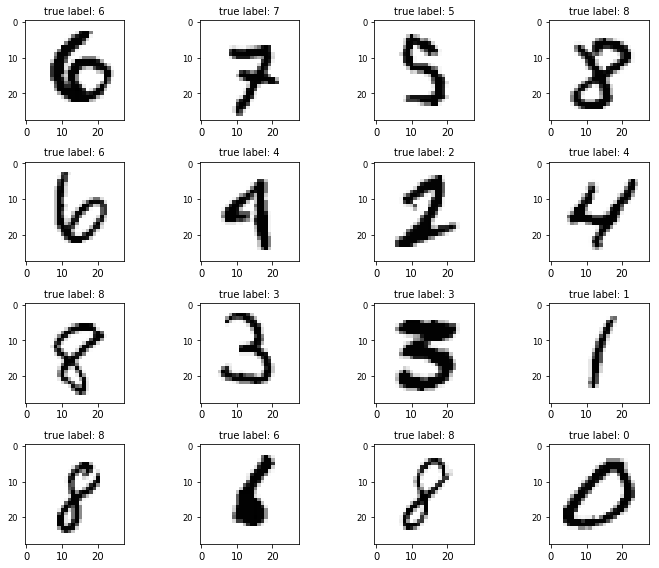

In [3]:
n_side = 4
fig, axarr = plt.subplots(n_side, n_side, figsize=(10,8))
for idx, ax in zip(np.random.randint(0, len(y_train), n_side**2), axarr.flatten()):
    mt.plot_digits(X_train, y_train, sample_idx=idx, ax=ax)
plt.tight_layout()
plt.savefig('./figures/mnist_samples.png')
plt.show()

In [4]:
model = mt.get_simple_model()

In [5]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3350/3350 [==============================] - 3s - loss: 0.5771 - acc: 0.8370     
Epoch 2/5
3350/3350 [==============================] - 3s - loss: 0.2232 - acc: 0.9334     
Epoch 3/5
3350/3350 [==============================] - 3s - loss: 0.1516 - acc: 0.9546     
Epoch 4/5
3350/3350 [==============================] - 3s - loss: 0.0824 - acc: 0.9752     
Epoch 5/5
3350/3350 [==============================] - 3s - loss: 0.0539 - acc: 0.9878     


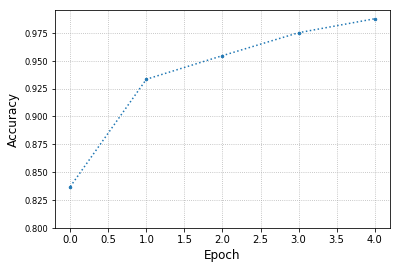

In [6]:
fig, ax = plt.subplots()
ax.plot(history.epoch, history.history['acc'], ls=':', marker='.')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.8)
ax.grid()
plt.show()

In [7]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Baseline Error: {}'.format(100-scores[1]*100))

Baseline Error: 6.545454545454547


In [8]:
classes = model.predict(X_test, batch_size=128)

In [9]:
classes[0]

array([  6.48175865e-06,   1.13864050e-10,   6.14868014e-08,
         1.30701692e-05,   4.51036147e-04,   1.56154006e-03,
         5.30476655e-06,   6.23249216e-05,   6.19369928e-07,
         9.97899532e-01], dtype=float32)

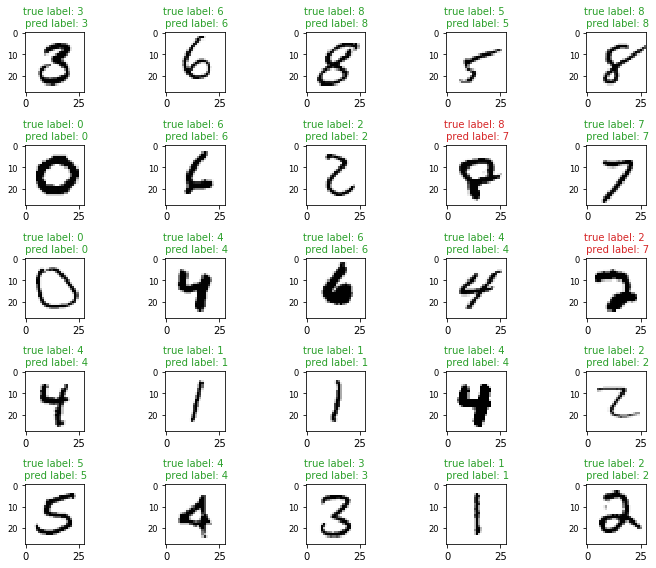

In [10]:
n_side = 5
fig, axarr = plt.subplots(n_side, n_side, figsize=(10,8))
for idx, ax in zip(np.random.randint(0, len(classes), n_side**2), axarr.flatten()):
    mt.plot_digits(X_test, y_test, classes, sample_idx=idx, ax=ax)
plt.tight_layout()
plt.savefig('./figures/mnist_simple_predictions.png')
plt.show()